In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
df=pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.shape

(1470, 35)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.shape

(1470, 35)

In [10]:
df.drop(['Over18','StandardHours','StockOptionLevel','EmployeeCount'], axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,14,3,4,17,3,2,9,6,0,8


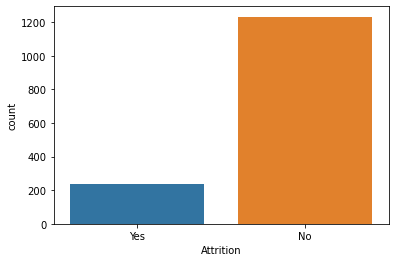

In [11]:
sns.countplot(df['Attrition'])

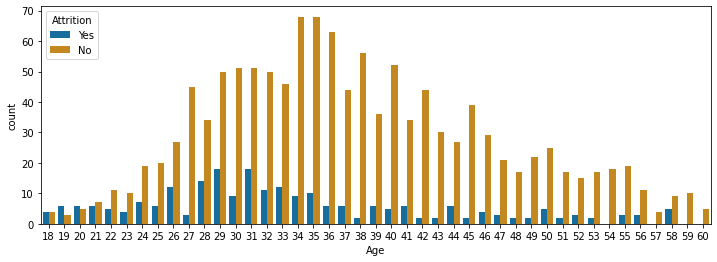

In [12]:
# show the no. of employees that left and stayed back by age
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')

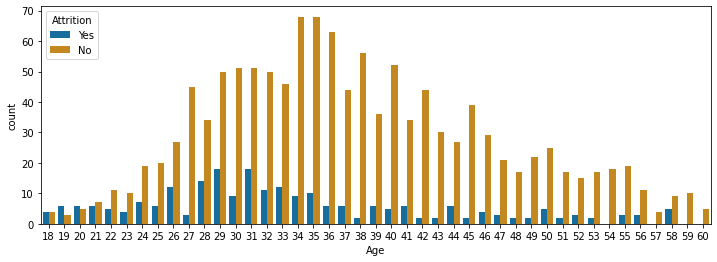

In [13]:
# show the no. of employees that left and stayed back by age
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')

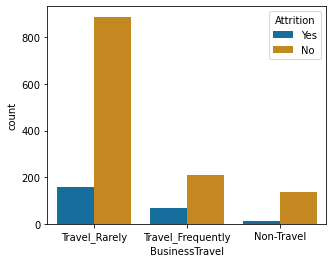

In [14]:
plt.subplots(figsize=(5,4))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='colorblind')

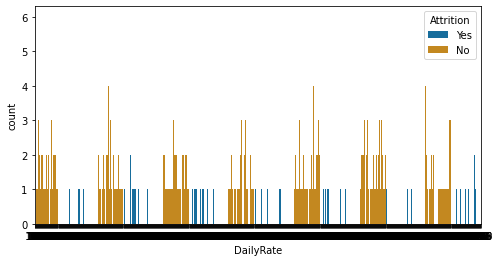

In [15]:
plt.subplots(figsize=(8,4))
sns.countplot(x='DailyRate', hue='Attrition', data=df, palette='colorblind')

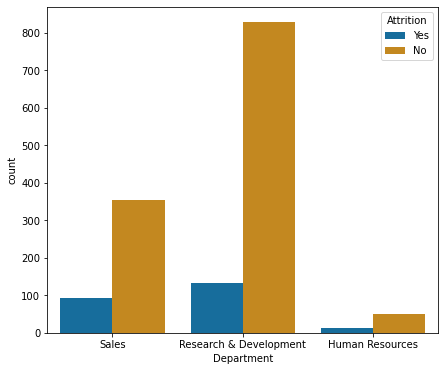

In [16]:
plt.subplots(figsize=(7,6))
sns.countplot(x='Department', hue='Attrition', data=df, palette='colorblind')

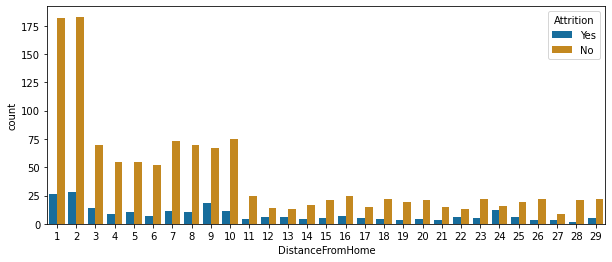

In [17]:
plt.subplots(figsize=(10,4))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df, palette='colorblind')

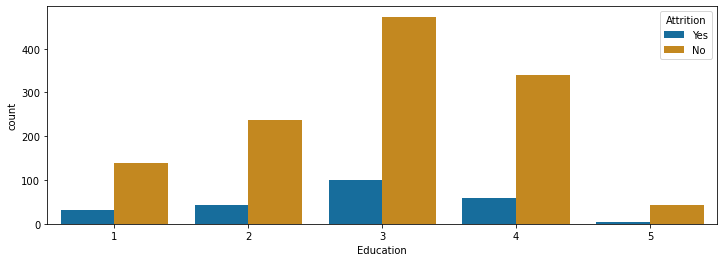

In [18]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Education', hue='Attrition', data=df, palette='colorblind')

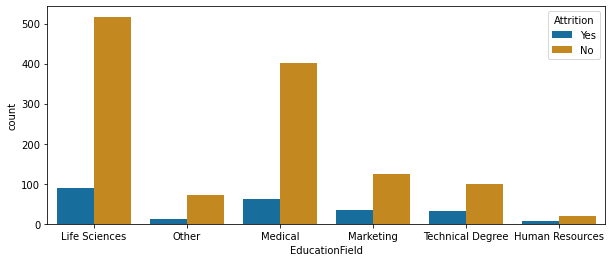

In [19]:
plt.subplots(figsize=(10,4))
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='colorblind')

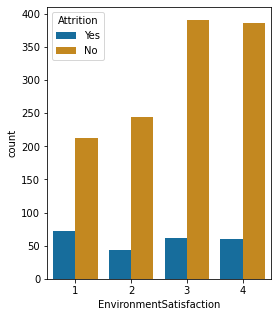

In [20]:
plt.subplots(figsize=(4,5))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='colorblind')

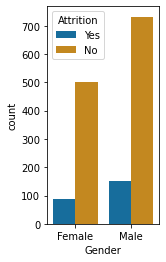

In [21]:
plt.subplots(figsize=(2,4))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='colorblind')

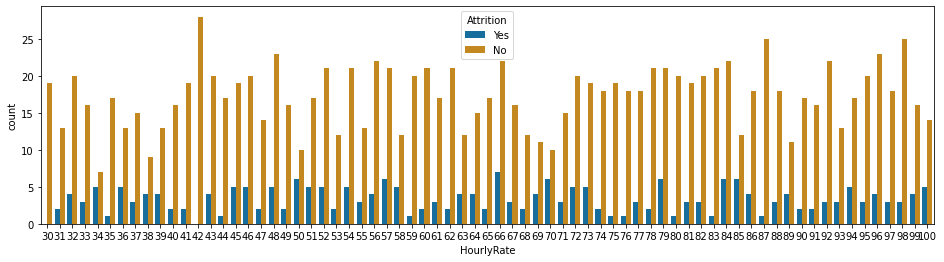

In [22]:
plt.subplots(figsize=(16,4))
sns.countplot(x='HourlyRate', hue='Attrition', data=df, palette='colorblind')

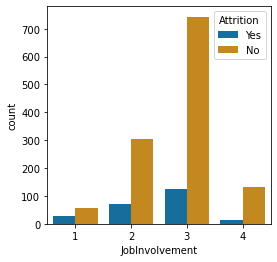

In [23]:
plt.subplots(figsize=(4,4))
sns.countplot(x='JobInvolvement', hue='Attrition', data=df, palette='colorblind')

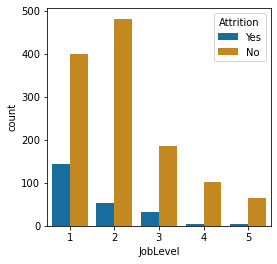

In [24]:
plt.subplots(figsize=(4,4))
sns.countplot(x='JobLevel', hue='Attrition', data=df, palette='colorblind')

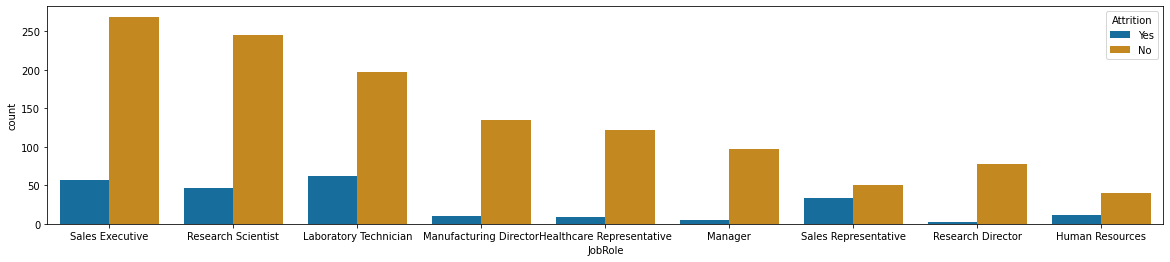

In [25]:
plt.subplots(figsize=(20,4))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='colorblind')

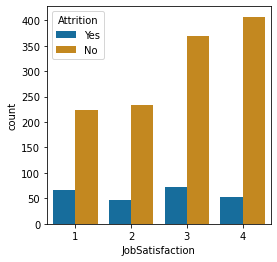

In [26]:
plt.subplots(figsize=(4,4))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='colorblind')

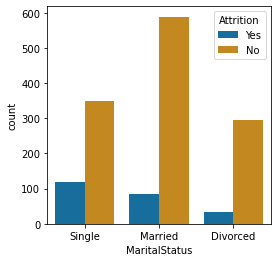

In [27]:
plt.subplots(figsize=(4,4))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='colorblind')

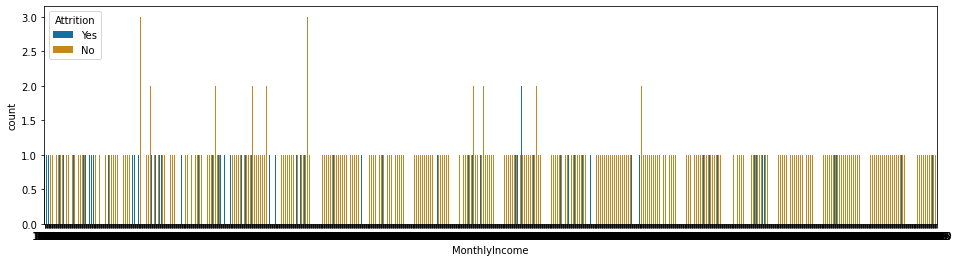

In [28]:
plt.subplots(figsize=(16,4))
sns.countplot(x='MonthlyIncome', hue='Attrition', data=df, palette='colorblind')

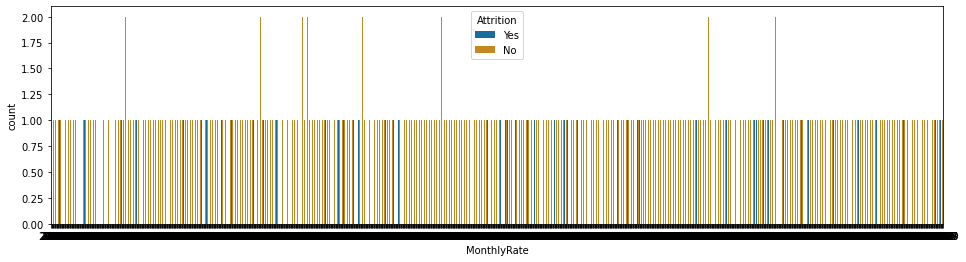

In [29]:
plt.subplots(figsize=(16,4))
sns.countplot(x='MonthlyRate', hue='Attrition', data=df, palette='colorblind')

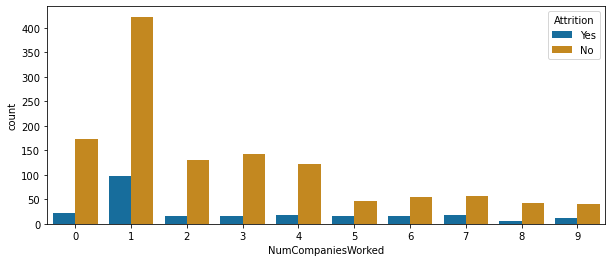

In [30]:
plt.subplots(figsize=(10,4))
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df, palette='colorblind')

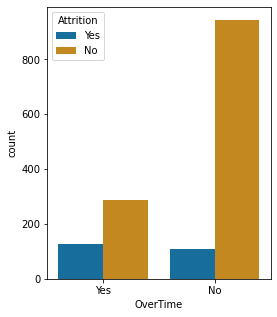

In [31]:
plt.subplots(figsize=(4,5))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='colorblind')

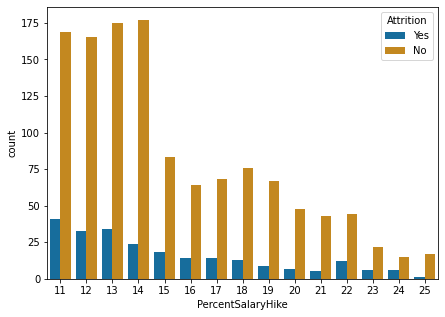

In [32]:
plt.subplots(figsize=(7,5))
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df, palette='colorblind')

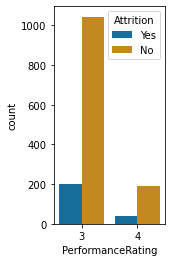

In [33]:
plt.subplots(figsize=(2,4))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette='colorblind')

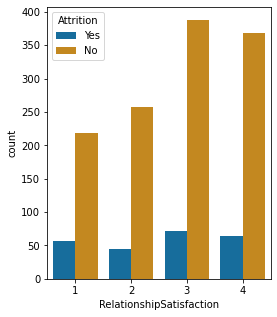

In [34]:
plt.subplots(figsize=(4,5))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette='colorblind')

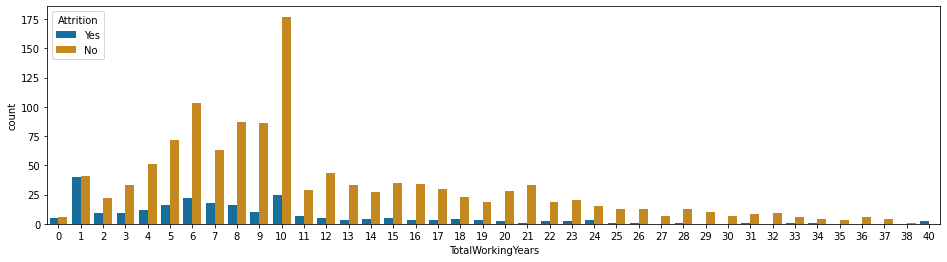

In [35]:
plt.subplots(figsize=(16,4))
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df, palette='colorblind')

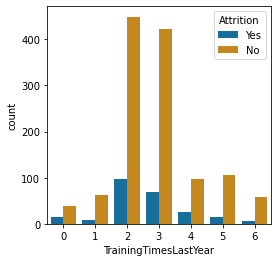

In [36]:
plt.subplots(figsize=(4,4))
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=df, palette='colorblind')

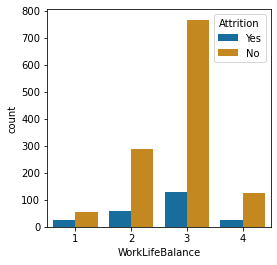

In [37]:
plt.subplots(figsize=(4,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='colorblind')

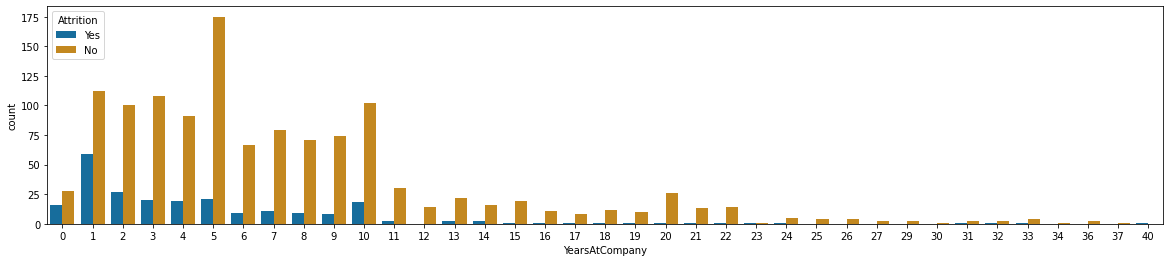

In [38]:
plt.subplots(figsize=(20,4))
sns.countplot(x='YearsAtCompany',hue='Attrition', data=df, palette='colorblind')

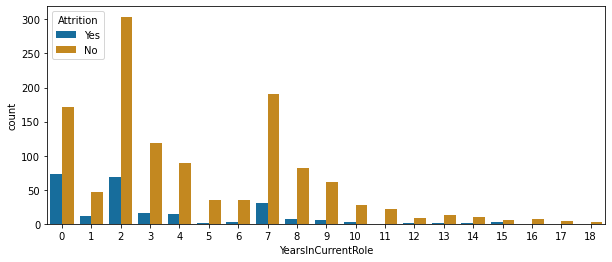

In [39]:
plt.subplots(figsize=(10,4))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='colorblind')

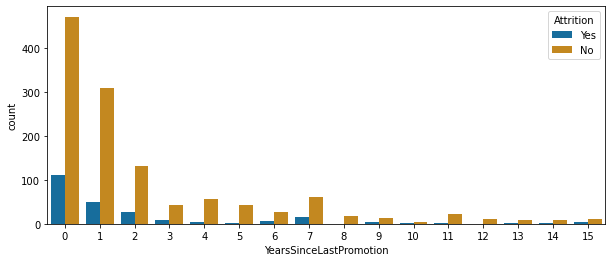

In [40]:
plt.subplots(figsize=(10,4))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, palette='colorblind')

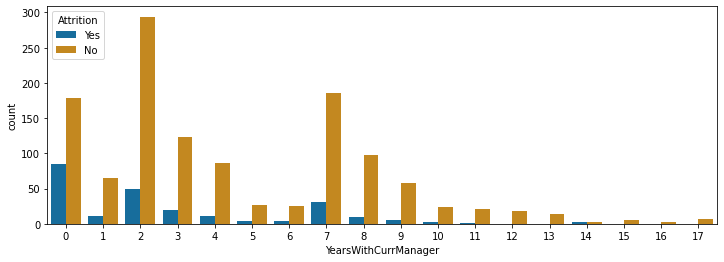

In [41]:
plt.subplots(figsize=(12,4))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df, palette='colorblind')

Findings on Reasons for Attrition
------------------------------------
Lower monthly income
Lower pwerformance Rating
Working overtime
Frequent travel
Long distance between work location and home
Sales people have high iteration compared to other departments
High job involvement